In [97]:
# Gaussian trials

In [322]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c

# Please implement the fit and predict methods of this class. You can add additional private methods
# by beginning them with two underscores. It may look like the __dummyPrivateMethod below.
# You can feel free to change any of the class attributes, as long as you do not change any of 
# the given function headers (they must take and return the same arguments), and as long as you
# don't change anything in the .visualize() method. 
class GaussianGenerativeModel:
    def __init__(self, isSharedCovariance=False):
        self.isSharedCovariance = isSharedCovariance
        self.mu_1 = None
        self.mu_2 = None
        self.mu_3 = None
        self.shared_cov = None
        self.cov_1 = None
        self.cov_2 = None
        self.cov_3 = None
        
    # Just to show how to make 'private' methods
    def __dummyPrivateMethod(self, input):
        return None

    # TODO: Implement this method!
    def fit(self, X, Y):
        
        self.X = X
        self.Y = Y
        
        labe1_1 = np.where(self.Y==1)
        labe1_2 = np.where(self.Y==2)
        labe1_3 = np.where(self.Y==3)
        #y_1,y_2,y_3 = self.Y.iloc[label_1],self.Y.iloc[label_2],self.Y.iloc[label_3]
        x_1,x_2,x_3 = self.X.iloc[label_1],self.X.iloc[label_2],self.X.iloc[label_3]
        
        self.mu_1 = np.mean(x_1)
        self.mu_2 = np.mean(x_2)
        self.mu_3 = np.mean(x_3)
        
        if self.isSharedCovariance:
            # Use weighted avg of separate covariances
            w_1 = len(labe1_1)/X.shape[0]
            w_2 = len(labe1_2)/X.shape[0]
            w_3 = len(labe1_3)/X.shape[0]
            
            self.shared_cov = w_1*np.cov(x_1.T)+w_2*np.cov(x_2.T)+w_3*np.cov(x_3.T)
        else:
            self.cov_1 = np.cov(x_1.T)
            self.cov_2 = np.cov(x_2.T)
            self.cov_3 = np.cov(x_3.T)
            
    def predict(self, X_to_predict):
        
        p = np.zeros([X_to_predict.shape[0],3])
        
        if self.isSharedCovariance:

            
            p[:,0]= multivariate_normal.pdf(X_to_predict,mean=self.mu_1,cov=self.shared_cov)
            p[:,1]= multivariate_normal.pdf(X_to_predict,mean=self.mu_2,cov=self.shared_cov)
            p[:,2]= multivariate_normal.pdf(X_to_predict,mean=self.mu_3,cov=self.shared_cov)
            
        else:
            p[:,0]= multivariate_normal.pdf(X_to_predict,mean=self.mu_1,cov=self.cov_1)
            p[:,1]= multivariate_normal.pdf(X_to_predict,mean=self.mu_2,cov=self.cov_2)
            p[:,2]= multivariate_normal.pdf(X_to_predict,mean=self.mu_3,cov=self.cov_3)
            
        y_pred = np.zeros([X_to_predict.shape[0],1])
        
        for idx,row in enumerate(p):
            y_pred[idx] = np.argmax(row)+1
            
        # return the argmax (the indices will correspond to class assignment here)
        return y_pred.T[0]
     

    # Do not modify this method!
    def visualize(self, output_file, width=3, show_charts=False):
        X = self.X.values
        # Create a grid of points
        x_min, x_max = min(X[:, 0] - width), max(X[:, 0] + width)
        y_min, y_max = min(X[:, 1] - width), max(X[:, 1] + width)
        xx,yy = np.meshgrid(np.arange(x_min, x_max, .005), np.arange(y_min,
            y_max, .005))

        # Flatten the grid so the values match spec for self.predict
        xx_flat = xx.flatten()
        yy_flat = yy.flatten()
        X_topredict = np.vstack((xx_flat,yy_flat)).T

        # Get the class predictions
        Y_hat = self.predict(X_topredict)
        Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1]))

        cMap = c.ListedColormap(['r','b','g'])

        # Visualize them.
        plt.figure()
        plt.pcolormesh(xx,yy,Y_hat, cmap=cMap)
        plt.scatter(X[:, 0], X[:, 1], c=self.Y, cmap=cMap,edgecolors='black')
        plt.savefig(output_file)
        if show_charts:
            plt.show()

In [323]:
import pandas as pd
data = pd.read_csv("fruit.csv")
x = data.loc[:,'width':'height']
#y = pd.get_dummies(data['fruit'])
y = data['fruit'].values

In [329]:
testG = GaussianGenerativeModel(isSharedCovariance=False)
testG.fit(x,y)

testG_sharedCov = GaussianGenerativeModel(isSharedCovariance=True)
testG_sharedCov.fit(x,y)

In [325]:
testG.predict(x)

array([1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 3., 2., 2., 2., 1., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

In [330]:
testG_sharedCov.predict(x)

array([1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 3., 2., 2., 2., 1., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

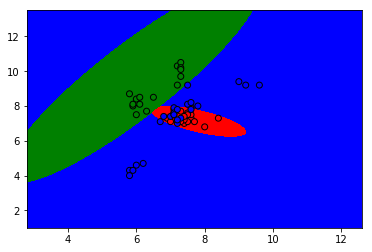

In [332]:
testG.visualize("Gaussian_viz_indi_cov.png")

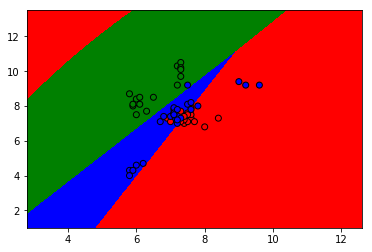

In [333]:
testG_sharedCov.visualize("Gaussian_viz_shared_cov.png")

In [334]:
from sklearn.metrics import confusion_matrix

y_pred = testG.predict(x)

#Evaluate Confusion Matrix of the Logit Regression
print("Confusion matrix Individual Covariance")
print(confusion_matrix(y,y_pred))

Confusion matrix Individual Covariance
[[18  1  0]
 [11 13  0]
 [ 0  0 16]]


In [336]:
from sklearn.metrics import confusion_matrix

y_pred = testG_sharedCov.predict(x)

#Evaluate Confusion Matrix of the Logit Regression
print("Confusion matrix Shared Covariance")
print(confusion_matrix(y,y_pred))

Confusion matrix Shared Covariance
[[14  5  0]
 [ 5 18  1]
 [ 0  0 16]]


In [ ]:
# We can see that the shared covariance fits slightly better, 
# with 10 rather than 12 missclassifications

In [337]:
x_test = np.array([[4,11],[8.5,7]])
y_pred = testG.predict(x_test)
print("Gaussian Regression individual covariance")
print("prediction for fruit with width 4cm and height 11 cm is {}".format(y_pred[0]))
print("prediction for fruit with width 8.5cm and height 7 cm is {}".format(y_pred[1]))

prediction for fruit with width 4cm and height 11 cm is 2.0
prediction for fruit with width 8.5cm and height 7 cm is 1.0


In [338]:
y_pred = testG_sharedCov.predict(x_test)
print("Gaussian Regression shared covariance")
print("prediction for fruit with width 4cm and height 11 cm is {}".format(y_pred[0]))
print("prediction for fruit with width 8.5cm and height 7 cm is {}".format(y_pred[1]))

Gaussian Regression shared covariance
prediction for fruit with width 4cm and height 11 cm is 1.0
prediction for fruit with width 8.5cm and height 7 cm is 1.0
